In [1]:
import numpy
import math
from math import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

In [2]:
plt.rcParams["figure.figsize"] = (30, 20)
plt.rcParams.update({'font.size': 40})

In [3]:
# the function that I'm going to plot
def f_x_y(x, y):
 return (1-(x**2+y**3))*exp(-(x**2+y**2)/2)

In [4]:
def gradient(x, y):
    z_x = x * exp(-(x**2+y**2)/2) * (x**2 + y**3 - 3)
    z_y = y * exp(-(x**2+y**2)/2) * (x**2 + y**3 - 4)
    return numpy.asanyarray([z_x, z_y])

In [5]:
def norm(matrice_1x2):
    n_line = matrice_1x2.shape[0]
    N = 0
    for i in range(n_line):
        N += matrice_1x2[i]**2
    return math.sqrt(N)

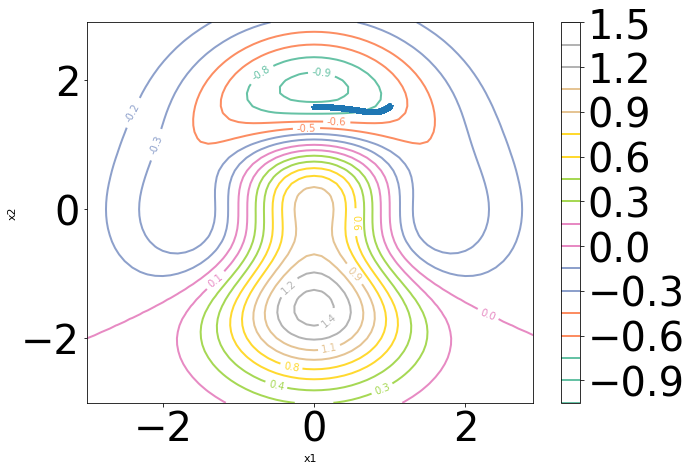

In [39]:
epsilon = pow(10,-6)
t = 0.001
i = 1
x1, x2 = 1, 1.6
grad_f = gradient(x1, x2)
last = grad_f.copy()
n_grad = norm(grad_f)
evolution_X1_X2 = [[x1, x2]]
dot_values = []
while n_grad > epsilon and i < 20000:
    direction = -grad_f
#     direction = [x1, x2]
    x1, x2 = x1 + t*direction[0], x2 + t*direction[1] 
    evolution_X1_X2 = numpy.vstack((evolution_X1_X2, [x1, x2]))
    grad_f = gradient(x1, x2)
    current = grad_f.copy()
    dot_value = numpy.dot(last, current)
    dot_values.append(dot_value)
    last = current.copy()
    n_grad = norm(grad_f)
    i +=1
evolution_X1 = evolution_X1_X2[:, 0]
evolution_X2 = evolution_X1_X2[:, 1]
# x1 = numpy.linspace(2, 3.5, 150)
# x2 = numpy.linspace(0.25, 1.75, 150)
x1 = arange(-3.0,3.0,0.1)
x2 = arange(-3.0,3.0,0.1)
X1, X2 = numpy.meshgrid(x1, x2)
Z = f_x_y(X1, X2)
fig = plt.figure(figsize = (10,7))
contours = plt.contour(X1, X2, Z, 20, linewidths=2, cmap=cm.Set2)
plt.clabel(contours, inline=True,fmt='%1.1f',fontsize=10)
# im = imshow(Z,cmap=cm.RdBu)
# colorbar(im)
# plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
# plt.plot(evolution_X1, evolution_X2)
plt.plot(evolution_X1, evolution_X2, '*')
plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()
# plt.legend(loc = "upper right")
plt.show()

In [29]:
n_grad

9.9975673920852e-07

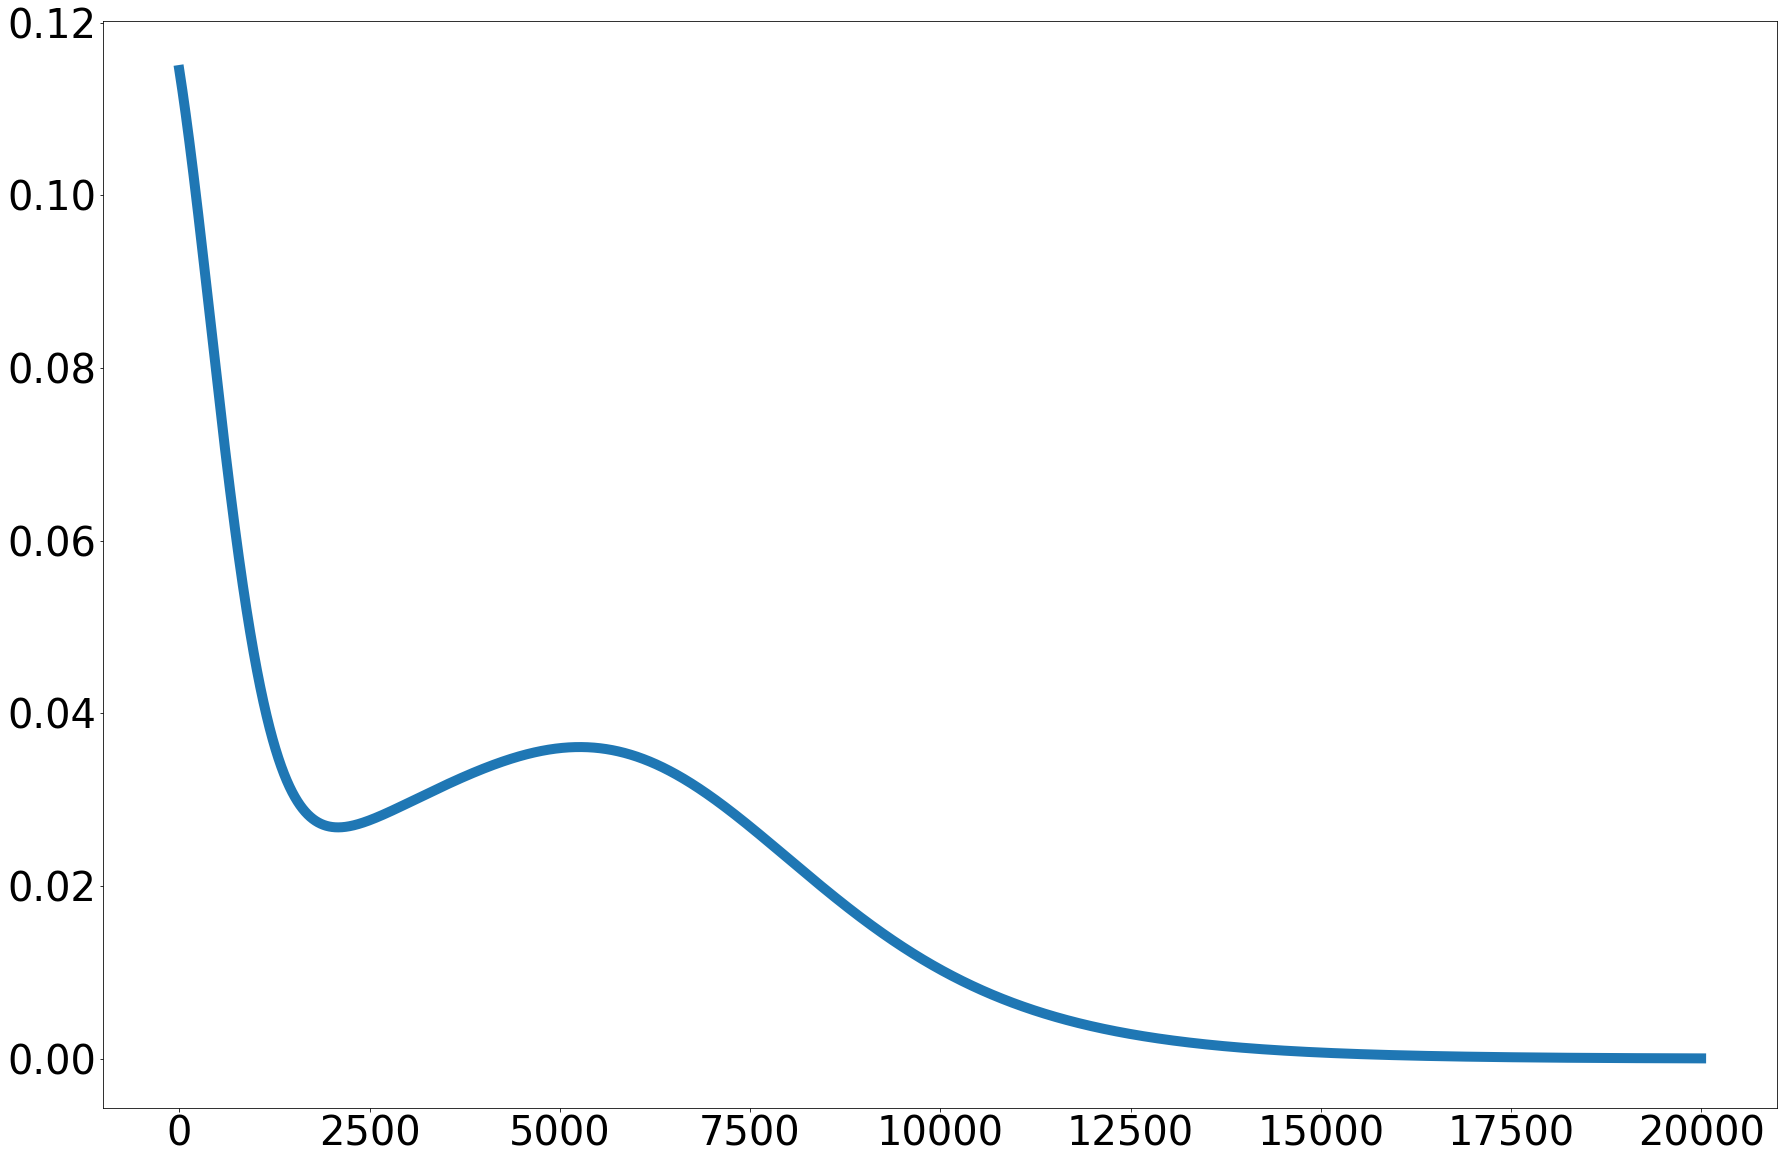

In [35]:
plt.plot(range(len(dot_values)), dot_values, linewidth=10)